In [6]:
from tqdm import tqdm
import os
os.chdir('/Users/grace/Cornell-Conversational-Analysis-Toolkit/')
from convokit import Corpus, User, Utterance

In [58]:
os.chdir('/Users/grace/Cornell-Conversational-Analysis-Toolkit/datasets/')
corpus = Corpus(filename='persuasion_corpus/corpus')
persuasioncorpus = corpus #Have to rename corpus as persuasion corpus so as not to mess up internal functions for later

In [49]:
corpustest = Corpus(filename='persuasion_corpus/corpus')

In [8]:
corpus.print_summary_stats()

Number of Users: 1285
Number of Utterances: 20932
Number of Conversations: 1017


## Average Number of Questions Per Conversation

In [5]:
import re
import numpy as np

In [6]:
np.mean(np.asarray(questions)[np.asarray(corpus.get_conversation(0)._utterance_ids)])

NameError: name 'questions' is not defined

In [7]:
questions = []
allutterids = corpus.get_utterance_ids()
for i in list(range(0, len(allutterids))):
    utter_id = allutterids[i]
    text = corpus.get_utterance(utter_id).text
    nquestions = len(re.findall(r'\?+', text))
    questions.append(nquestions) #gives number of questions in each utterance


In [8]:
allconvoids = corpus.get_conversation_ids()
for i in list(range(0, len(allconvoids))):
    convo_id = allconvoids[i]
    convo_utters = corpus.get_conversation(convo_id)._utterance_ids
    avgquestion = np.mean(np.asarray(questions)[np.asarray(convo_utters)])
    corpus.get_conversation(convo_id)._meta["Avg Questions"] = avgquestion
    

In [9]:
corpus.get_conversation(0)

Conversation({'_owner': <convokit.model.corpus.Corpus object at 0x1a207bc390>, '_id': 0, '_utterance_ids': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], '_usernames': None, '_meta': {'Avg Questions': 0.38095238095238093}})

Things to do now:
1. Put this function into the avgQuestions.py
2. Test calling on this transformer and seeing if it gives results correctly

In [10]:
from convokit import avgQuestions

In [11]:
avgQuestions.AvgQuestions

convokit.avgQuestions.avgQuestions.AvgQuestions

In [12]:
nQuestions = avgQuestions.AvgQuestions()
corpus2 = nQuestions.transform(persuasioncorpus)

In [13]:
corpus2.get_conversation(0) #Matches results!

Conversation({'_owner': <convokit.model.corpus.Corpus object at 0x1a207bc390>, '_id': 0, '_utterance_ids': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], '_usernames': None, '_meta': {'Avg Questions': 0.38095238095238093, 'AvgQuestions': 0.38095238095238093}})

## Creating Hesitancy Measure

In [41]:
pause_words = ['um', 'umm', 'ummm', 'uh', 'uhh', 'uhhh', 'hm', 'hmm', 'hmmm', 'er', 'err', 'uh huh', 'huh',
               'mhm', 'mhmm', 'erm', '...', 'ah', 'ahh', 'ahem', 'eh', 'ehh', 'ehhh', 'meh']
hesitant_words = ['maybe', 'not',  'sure', 'unsure', 'probably', 'well', 'okay', 'like', 'actually', 
                   'basically', 'seriously', 'totally', 'literally', 'know', 'mean', 
                   'guess', 'suppose', 'but', 'something', 'so', 'wow', 'just', 'really', 
                  'later', 'wait', 'future', 'almost', 'slightly', 'perhaps', 'somehow', 
                 'sort', 'kind', 'little', 'somewhat', 'hey', 'alas', 'see', 'sounds', 'ok',
                 'roughly', 'why', 'how', 'yep', 'yup', 'may', 'possibly', 'might', 'could', 'doubt',
                 'skeptical', 'don\'t', 'won\'t', 'nah']
text = "trial string something random*#&$ dkj okay@ now what? hey sounds literally"
textcleaned = "".join(c for c in text if c not in ('!','.',':', '?', '\'', ',', '\"', '@', '#', '$', '%', 
                                                       '^', '&', '*', '(', ')', '-', '~', '`', '_', '+', '=', 
                                                       '>', '<', '[', ']', '{', '}'))
textlist = textcleaned.split()
textsubset = [i for i in textlist if i in hesitant_words]
len(textsubset)

5

In [42]:
pause = []
hesitancy = []
allutterids = corpus.get_utterance_ids()
for i in list(range(0, len(allutterids))):
    utter_id = allutterids[i]
    text = corpus.get_utterance(utter_id).text
    textcleaned = "".join(c for c in text if c not in ('!','.',':', '?', '\'', ',', '\"', '@', '#', '$', '%', 
                                                       '^', '&', '*', '(', ')', '-', '~', '`', '_', '+', '=', 
                                                       '>', '<', '[', ']', '{', '}'))
    textlist = textcleaned.split()
    npause = len([i for i in textlist if i in pause_words])
    nhesitant = len([i for i in textlist if i in hesitant_words])
    pause.append(npause) #gives number of pause words in each utterance
    hesitancy.append(nhesitant) #gives number of hesitant words in each utterance
    corpus.get_utterance(utter_id).meta['Pause'] = npause
    corpus.get_utterance(utter_id).meta['Hesitancy'] = nhesitant

In [43]:
import numpy as np
print(np.mean(np.asarray(hesitancy)))
print(np.mean(np.asarray(pause)))
np.sum(np.asarray(hesitancy)[0:19])

0.8692432639021593
0.0009077011274603477


15

In [45]:
corpus.get_utterance(0)

Utterance({'id': 0, 'user': User([('name', 'A3A07QA5U733HQ')]), 'root': 0, 'reply_to': None, 'timestamp': None, 'text': 'Good morning. How are you doing today?', 'meta': {'role': 0, 'turn_index': 0, 'dialogue_id': '20180904-045349_715_live', 'er_label_1': 'greeting', 'ee_label_1': None, 'er_label_2': None, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'Pause': 0, 'Hesitancy': 0}})

In [46]:
allconvoids = corpus.get_conversation_ids()
for i in list(range(0, len(allconvoids))):
    convo_id = allconvoids[i]
    convo_utters = corpus.get_conversation(convo_id)._utterance_ids
    avgpause = np.mean(np.asarray(pause)[np.asarray(convo_utters)])
    avghesitancy = np.mean(np.asarray(hesitancy)[np.asarray(convo_utters)])
    corpus.get_conversation(convo_id)._meta["Avg Pause"] = avgpause
    corpus.get_conversation(convo_id)._meta["Avg Hesitancy"] = avghesitancy
    

In [47]:
corpus.get_conversation(0)

Conversation({'_owner': <convokit.model.corpus.Corpus object at 0x10a07bd68>, '_id': 0, '_utterance_ids': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], '_usernames': None, '_meta': {'Avg Pause': 0.0, 'Avg Hesitancy': 0.8095238095238095}})

In [35]:
from convokit import hesitancy

In [36]:
hesitancy.hesitancy

convokit.hesitancy.hesitancy.hesitancy

In [37]:
h = hesitancy.hesitancy()
corpus3 = h.transform(persuasioncorpus)

In [39]:
corpus3.get_utterance(0) #result matches!

Utterance({'id': 0, 'user': User([('name', 'A3A07QA5U733HQ')]), 'root': 0, 'reply_to': None, 'timestamp': None, 'text': 'Good morning. How are you doing today?', 'meta': {'role': 0, 'turn_index': 0, 'dialogue_id': '20180904-045349_715_live', 'er_label_1': 'greeting', 'ee_label_1': None, 'er_label_2': None, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'Pause': 0, 'Hesitancy': 0}})

In [40]:
corpus3.get_conversation(0) #result matches!

Conversation({'_owner': <convokit.model.corpus.Corpus object at 0x10a07bd68>, '_id': 0, '_utterance_ids': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], '_usernames': None, '_meta': {'Avg Pause': 0.0, 'Avg Hesitancy': 0.8095238095238095}})

## E2 Applying Measure to Dataset

Let Y be whether the persuadee's donation amount matches his or her pledged amount. We can perform a logistic regression using the average hesitancy/pause words per dialogue and demographic/personality score metadata (for persuadee) as features. 


In [59]:
persuasioncorpus.get_conversation(0)

Conversation({'_owner': <convokit.model.corpus.Corpus object at 0x1a1faa28d0>, '_id': 0, '_utterance_ids': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], '_usernames': None, '_meta': {}})

Hacky fix for conversation metadata not loading with corpus, for some reason. 

In [94]:
import json
with open("/Users/grace/Cornell-Conversational-Analysis-Toolkit/datasets/persuasion_corpus/corpus/conversations.json") as file:
    data = json.load(file)
for k, v in data.items():
    persuasioncorpus.get_conversation(int(k)).meta = v

In [95]:
corpus_full = h.transform(persuasioncorpus)

In [96]:
corpus_full.get_conversation(0)

Conversation({'_owner': <convokit.model.corpus.Corpus object at 0x1a1faa28d0>, '_id': 0, '_utterance_ids': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], '_usernames': None, '_meta': {'donation_amt': '0', 'num_turns': '11', 'intended_amt': 0.2, 'persuader': 'A3A07QA5U733HQ', 'persuadee': 'A25L985XCNESXE', 'Avg Pause': 0.0, 'Avg Hesitancy': 0.8095238095238095}})

In [97]:
persuadeeID = corpus_full.get_conversation(0)._meta['persuadee']
persuadeeID
corpus_full.get_user(persuadeeID).meta['age.x']

'50'

In [98]:
final_amt = []
pledged_amt = []
conscientious = []
loyalty = []
conform = []
age = []
income = []
gender = []
hesitancy = []
pause = []

allconvoids = corpus_full.get_conversation_ids()
for i in list(range(0, len(allconvoids))):
    convo_id = allconvoids[i]
    donation = corpus_full.get_conversation(convo_id)._meta['donation_amt']
    pledge = corpus_full.get_conversation(convo_id)._meta['intended_amt']
    final_amt.append(donation) 
    pledged_amt.append(pledge) 
    persuadeeID = corpus_full.get_conversation(convo_id)._meta['persuadee']
    
    hesitancy.append(corpus_full.get_conversation(convo_id)._meta['Avg Hesitancy'])
    pause.append(corpus_full.get_conversation(convo_id)._meta['Avg Pause'])
    conscientious.append(corpus_full.get_user(persuadeeID).meta['conscientious.x'])
    loyalty.append(corpus_full.get_user(persuadeeID).meta['loyalty.x'])
    conform.append(corpus_full.get_user(persuadeeID).meta['conform.x'])
    age.append(corpus_full.get_user(persuadeeID).meta['age.x'])
    income.append(corpus_full.get_user(persuadeeID).meta['income.x'])
    gender.append(corpus_full.get_user(persuadeeID).meta['sex.x'])
    
                         
    

In [144]:
import pandas as pd

df = pd.DataFrame({'donation': final_amt, 'pledged': pledged_amt, 'conscientious':conscientious, 
                  'loyalty': loyalty, 'conform': conform, 'age': age, 'income':income, 
                'hesitancy':hesitancy, 'pause':pause})

In [145]:
df.head(5)

,donation,pledged,conscientious,loyalty,conform,age,income,hesitancy,pause
0,0,0.20,3.8,2.333333333,6,50,10,0.809524,0.0
1,0,NaN,3.2,3.333333333,3,30,2,0.700000,0.0
2,0.05,0.05,3.8,1,5,28,4,1.150000,0.0
3,0,NaN,4.8,3.666666667,6,42,9,0.428571,0.0
4,0,NaN,4.2,3.333333333,5,32,9,1.238095,0.0


In [155]:
df['donation'].replace('', np.nan, inplace=True)
df['pledged'].replace('', np.nan, inplace=True)
df['conscientious'].replace('', np.nan, inplace=True)
df['loyalty'].replace('', np.nan, inplace=True)
df['conform'].replace('', np.nan, inplace=True)
df['age'].replace('', np.nan, inplace=True)
df['income'].replace('', np.nan, inplace=True)
df['hesitancy'].replace('', np.nan, inplace=True)
df['pause'].replace('', np.nan, inplace=True)

In [156]:
df2 = df.dropna()
df2.head()

,donation,pledged,conscientious,loyalty,conform,age,income,hesitancy,pause
0,0,0.20,3.8,2.333333333,6,50,10,0.809524,0.0
2,0.05,0.05,3.8,1,5,28,4,1.150000,0.0
24,0.05,0.25,4.8,2,4,35,3,1.285714,0.0
29,0,0.30,4,2,3,36,2,0.850000,0.0
41,1,1.00,5,3.666666667,5,53,11,0.523810,0.0


In [157]:
df2.shape

(212, 9)

In [159]:
Y = df2['donation'].astype(float) == df2['pledged'].astype(float)
Y.head(5)


0     False
2      True
24    False
29    False
41     True
dtype: bool

In [163]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression().fit(df2.values[0:172,2:], Y[0:172])


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [164]:
score = logit_model.score(df2.values[172:,2:], Y[172:])
print(score)

0.725


In [179]:
print(logit_model.coef_)
print(df2.columns[2:])

[[ 0.17554184 -0.26958433  0.00108967  0.01911428 -0.03467227 -0.78883752
   0.06217282]]
Index(['conscientious', 'loyalty', 'conform', 'age', 'income', 'hesitancy',
       'pause'],
      dtype='object')


In [171]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(df2.values[0:172,2:], Y[0:172])

y_pred=rf.predict(df2.values[172:,2:])

In [172]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y[172:], y_pred))

Accuracy: 0.725


In [177]:
feature_imp = pd.Series(rf.feature_importances_, index=df2.columns[2:]).sort_values(ascending=False)
feature_imp

hesitancy        0.252533
age              0.219948
loyalty          0.157050
conscientious    0.139614
income           0.119875
conform          0.085968
pause            0.025012
dtype: float64

No handles with labels found to put in legend.


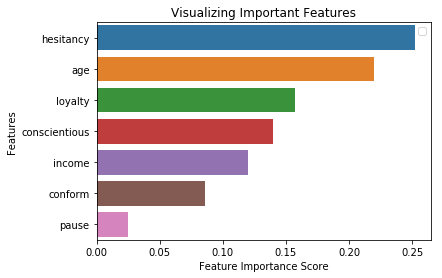

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()